In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
train_df = pd.read_csv('./data/bank_app_reviews_train.csv')
train_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리


In [3]:
test_df = pd.read_csv('./data/bank_app_reviews_test.csv')
test_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2024-02-08,5,고경민계장님감사해요,"안녕하세요 최순녀 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리
1,2023-07-24,5,저축목표피드 새로 생긴거 너무좋은데 분명 카테고리를 저축으로 했는데 왜 인식이 안되...,"신아​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 소중한 시간내어 고객센터에 ...",뱅크샐러드
2,2023-09-25,1,아니 이딴걸 편리하게 사용하는앱이라고 쳐만들엇나 이렇게 불편하게만든건 일부러그런거에...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리
3,2024-02-15,3,몇 년째 만족하며 사용중이라 조금식 개선되어거는 모습에 만족하며 사용중입니다. 하지...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드에 KB pay를 연결해 모든 자...,뱅크샐러드
4,2023-06-19,5,스타뱅킹을 사용 하고나서부터 편안해서 좋아요,"한송림 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22246 entries, 0 to 22245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     22246 non-null  object
 1   평점      22246 non-null  int64 
 2   사용자리뷰   22246 non-null  object
 3   업체답변    19141 non-null  object
 4   은행명     22246 non-null  object
dtypes: int64(1), object(4)
memory usage: 869.1+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     9534 non-null   object
 1   평점      9534 non-null   int64 
 2   사용자리뷰   9534 non-null   object
 3   업체답변    8221 non-null   object
 4   은행명     9534 non-null   object
dtypes: int64(1), object(4)
memory usage: 372.5+ KB


In [6]:
train_df['평점'].value_counts()

평점
5    11416
1     6751
4     1824
3     1308
2      947
Name: count, dtype: int64

<Axes: xlabel='평점', ylabel='count'>

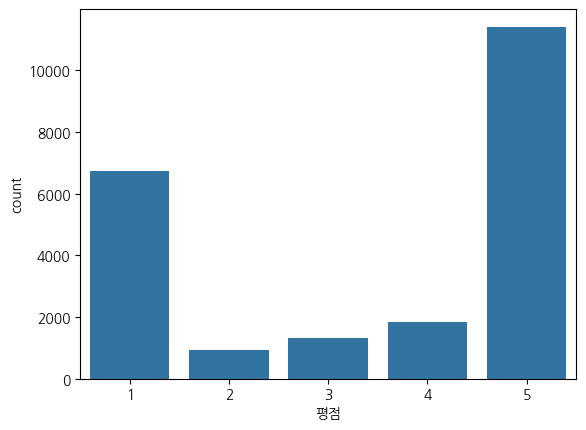

In [12]:
sns.barplot(train_df['평점'].value_counts())

In [13]:
train_df['긍정'] = train_df['평점'].apply(lambda x : 1 if x > 3 else 0)
train_df

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나,1
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한,0
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스,0
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리,0
...,...,...,...,...,...,...
22241,2025-03-12,3,어플 시작오류가 가끔 나네요.,안녕하세요 푸딩 고객님. 우리은행 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 2...,우리,0
22242,2025-01-09,1,업데이트 후에 계좌이체하는 게 자주 튕겨요,안녕하세요 일월구일 고객님. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
22243,2023-07-07,5,굳굳굳,"Seung Woo Kim 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로...",국민,1
22244,2024-10-10,5,오래시간 같이한 나의은행 든든합니다.,안녕하세요 lee jeong seon (isate) 고객님. 칭찬 진심으로 감사드리...,우리,1


In [14]:
test_df['긍정'] = test_df['평점'].apply(lambda x : 1 if x > 3 else 0)
test_df

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2024-02-08,5,고경민계장님감사해요,"안녕하세요 최순녀 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리,1
1,2023-07-24,5,저축목표피드 새로 생긴거 너무좋은데 분명 카테고리를 저축으로 했는데 왜 인식이 안되...,"신아​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 소중한 시간내어 고객센터에 ...",뱅크샐러드,1
2,2023-09-25,1,아니 이딴걸 편리하게 사용하는앱이라고 쳐만들엇나 이렇게 불편하게만든건 일부러그런거에...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
3,2024-02-15,3,몇 년째 만족하며 사용중이라 조금식 개선되어거는 모습에 만족하며 사용중입니다. 하지...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드에 KB pay를 연결해 모든 자...,뱅크샐러드,0
4,2023-06-19,5,스타뱅킹을 사용 하고나서부터 편안해서 좋아요,"한송림 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
...,...,...,...,...,...,...
9529,2025-04-05,1,만보기 이벤트는 실망스러워요. 후기 말투 다 똑같고 사기 맞죠? 양심이 참... 정...,"안녕하세요. 송송님, 토스팀입니다. 만족스러운 서비스를 제공하기 위해 노력하였으나,...",토스,0
9530,2023-05-17,5,기능이 많아 다 사용해보진 못 했지만 대체적으로 편한거 같아요,이강욱 고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 고객...,국민,1
9531,2023-07-05,5,편리하네요.,"농사꾼 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
9532,2024-12-20,5,사용하기 편리해요,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1


In [16]:
train_df['은행명'].value_counts()

은행명
국민       8863
토스       6201
우리       2969
하나       1932
신한       1764
뱅크샐러드     517
Name: count, dtype: int64

In [18]:
train_df['은행명'].unique()

array(['하나', '신한', '국민', '토스', '우리', '뱅크샐러드'], dtype=object)

## 변수를 자동으로 생성하면서 긍정부정 데이터프레임 만들기
* globals()[변수명] : 변수 생성 가능

In [20]:
bank_en_list = ['hana','shinhan','kb','toss','woori','banksalad']

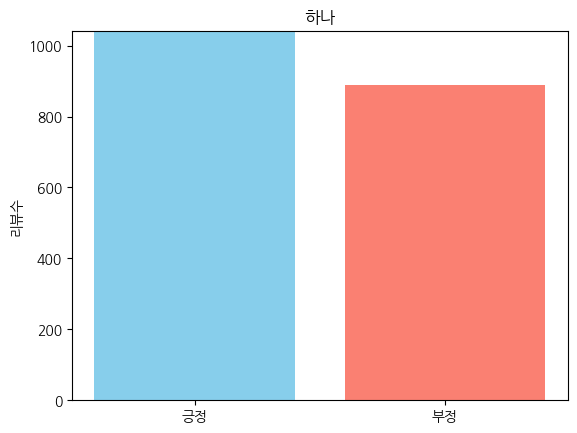

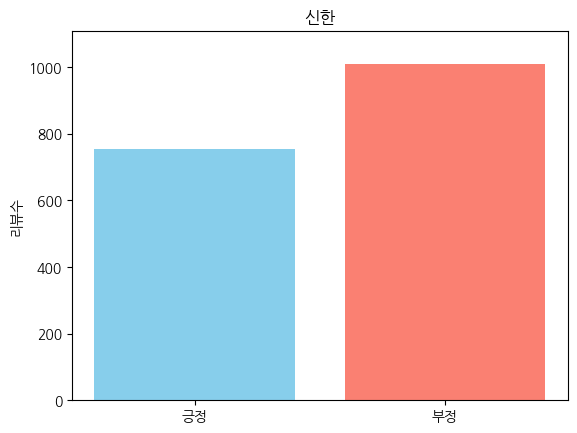

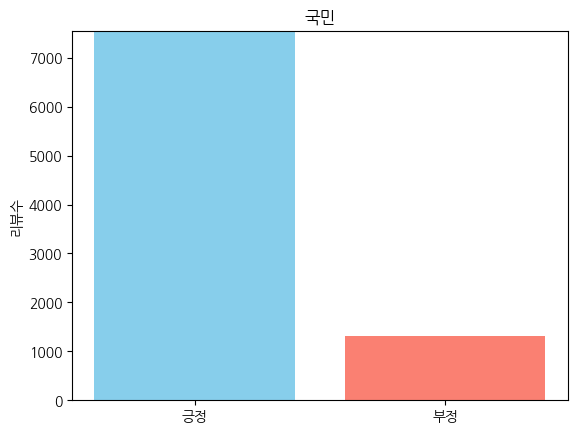

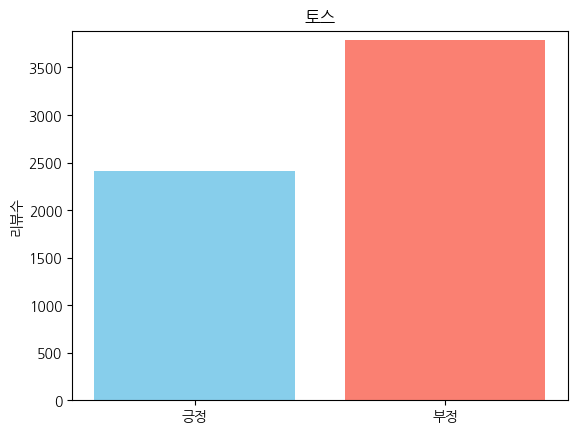

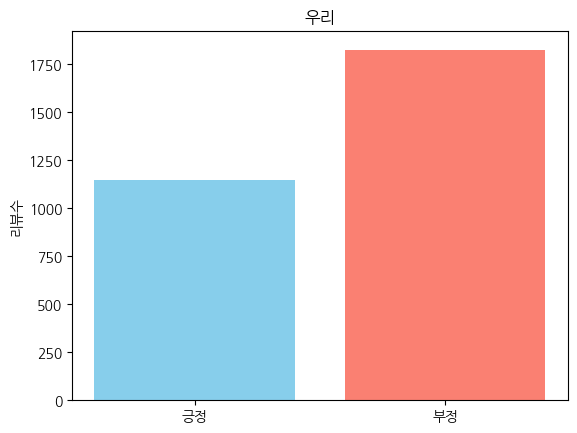

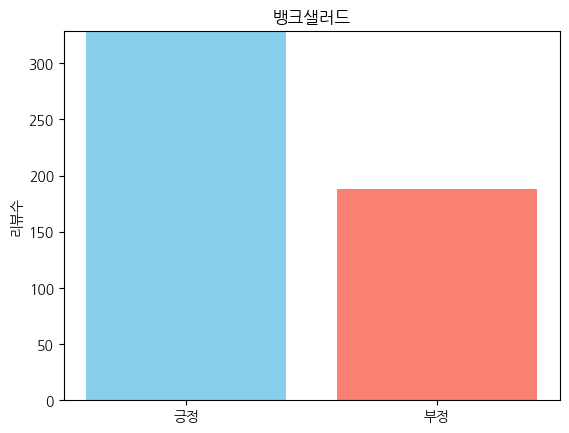

In [25]:
pos_neg_list = []
for bank, bank_eng in zip(train_df['은행명'].unique(), bank_en_list):
    
    # 은행별 긍정 부정 리뷰 필터링
    pos = train_df[(train_df['은행명'] == bank) &(train_df['긍정'] == 1)]
    neg = train_df[(train_df['은행명'] == bank) &(train_df['긍정'] == 0)]
    
    # 전역변수를 자동 생성해서 저장
    globals()[f'{bank_eng}_pos'] = pos
    globals()[f'{bank_eng}_neg'] = neg
    pos_neg_list.append(f'{bank_eng}_pos')
    pos_neg_list.append(f'{bank_eng}_neg')
    
    # 시각화
    plt.bar(['긍정', '부정'], [pos.shape[0], neg.shape[0]], color=['skyblue','salmon'])
    plt.title(bank)
    plt.ylabel('리뷰수')
    plt.ylim(0, max(pos.shape[0], neg.shape[0]+100))
    plt.show()

## 모든 데이터프레임에서 특수문자 제거하기

In [31]:
import re
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = ' '.join(matches)
    return matches

In [34]:
for bank in pos_neg_list:
    globals()[bank]['사용자리뷰'] = globals()[bank]['사용자리뷰'].apply(text_clean)

/tmp/ipykernel_13562/295539541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[bank]['사용자리뷰'] = globals()[bank]['사용자리뷰'].apply(text_clean)


# 은행별 긍정·부정 리뷰 워드클라우드 만들기

In [26]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [27]:
from wordcloud import WordCloud
from konlpy.tag import Mecab
mecab = Mecab()

In [28]:
pos_neg_list

['hana_pos',
 'hana_neg',
 'shinhan_pos',
 'shinhan_neg',
 'kb_pos',
 'kb_neg',
 'toss_pos',
 'toss_neg',
 'woori_pos',
 'woori_neg',
 'banksalad_pos',
 'banksalad_neg']

In [37]:
# 사용자리뷰 컬럼을 Series에서 list로 변경
text_data = hana_pos['사용자리뷰'].astype(str).tolist()
text_data

['엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 저도 쓰고있음',
 'Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨면서 튕기네요 재부팅도 해보고 어플 삭제 후 재설치 해도 마찬가지네요 참고로 3년간 아무이상 없이 잘 사용했고 오늘 갑자기 이럽니다',
 '뱅킹 잘 이용하고 있어요 항상친절 하게 설명 해 주셔서 감사 수고하세요',
 '잘쓰고잇어용',
 '감사합니다',
 '등 h 2 5s0',
 '아직까지 잘 사용하고 있습니다',
 '좋음',
 '매우 잘 쓰고 있습니다 그런데 앱이 실행이 안되네요',
 '월급통장 자유적금 안내가 바로나와서 너무 편하고 좋네요 직관적으로 알아보기 쉬워요',
 '쓰기 편함',
 '굿입니다',
 '원하는대로 척척 다됩니다 일상생활에 늘 사용중입니다',
 '알람이 안떠서 직접 가서 알람 뜨도록 설정 을 했는데 돈만 가져가고 알람 안뜨네요 은행에서도 가서 얘기를 했더니 알람 뜨게 설정했다고 말만 하고 조취를 안해주네요 이제는 앱 들어 갈라고 할때마다 튕귀고 폰 껐다켰다 해봐도 안 들어가지네요 하나에 이체 보내야 되는데 못하고 있고 하나 업데이트 해라고 뜨는데 막상 스토어에들어가서 업데이트 할라니깐 업데이트가 안뜨고 뭐 어떻게 해라는지 모르겠네요',
 '굿',
 'Gooooo',
 'good',
 '굿',
 '조아요',
 '우리는 하나다 한반도는 하나의 민족임을 알려주는 하나은행입니다',
 '운전면허증을 촬영했으나 2번이나 사본 대신 원본을 촬영하라는 메시지가 떠서 결국은 3번을 촬영하고 나서야 확인됨 인식 기능에 문제가 있는 것으로 사료되오니 개선하여 주십시오',
 '감사합니다',
 '앱에서 혼자 다 할수있게 설명 잘되어있어요',
 '쉽게 설명돼 있어서 좋으네요',
 '간단하게 대출이 되네요',
 '자산관리 한눈에 보이게 정리해 줘서 정말 편합니다 언제 얼마나 지출했는지 그래프로 보여주니 한눈에 보이고 좋아요',
 '사용이 편리해요',
 '좋아요 잘보이고요',
 '티켓 사려고 설치했는데 계좌

In [38]:
# 다시 join으로 1개의 문자열로 반환
full_text = ' '.join(text_data)
full_text

'엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 저도 쓰고있음 Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨면서 튕기네요 재부팅도 해보고 어플 삭제 후 재설치 해도 마찬가지네요 참고로 3년간 아무이상 없이 잘 사용했고 오늘 갑자기 이럽니다 뱅킹 잘 이용하고 있어요 항상친절 하게 설명 해 주셔서 감사 수고하세요 잘쓰고잇어용 감사합니다 등 h 2 5s0 아직까지 잘 사용하고 있습니다 좋음 매우 잘 쓰고 있습니다 그런데 앱이 실행이 안되네요 월급통장 자유적금 안내가 바로나와서 너무 편하고 좋네요 직관적으로 알아보기 쉬워요 쓰기 편함 굿입니다 원하는대로 척척 다됩니다 일상생활에 늘 사용중입니다 알람이 안떠서 직접 가서 알람 뜨도록 설정 을 했는데 돈만 가져가고 알람 안뜨네요 은행에서도 가서 얘기를 했더니 알람 뜨게 설정했다고 말만 하고 조취를 안해주네요 이제는 앱 들어 갈라고 할때마다 튕귀고 폰 껐다켰다 해봐도 안 들어가지네요 하나에 이체 보내야 되는데 못하고 있고 하나 업데이트 해라고 뜨는데 막상 스토어에들어가서 업데이트 할라니깐 업데이트가 안뜨고 뭐 어떻게 해라는지 모르겠네요 굿 Gooooo good 굿 조아요 우리는 하나다 한반도는 하나의 민족임을 알려주는 하나은행입니다 운전면허증을 촬영했으나 2번이나 사본 대신 원본을 촬영하라는 메시지가 떠서 결국은 3번을 촬영하고 나서야 확인됨 인식 기능에 문제가 있는 것으로 사료되오니 개선하여 주십시오 감사합니다 앱에서 혼자 다 할수있게 설명 잘되어있어요 쉽게 설명돼 있어서 좋으네요 간단하게 대출이 되네요 자산관리 한눈에 보이게 정리해 줘서 정말 편합니다 언제 얼마나 지출했는지 그래프로 보여주니 한눈에 보이고 좋아요 사용이 편리해요 좋아요 잘보이고요 티켓 사려고 설치했는데 계좌 없어도 되네요 좋아요 사용하기로 편해서 좋아요 좋습니다 대출 알아봤는데 잘 해결했습니다 고맙습니다 다른 은행 앱이랑 다르게 빠르고 모바일로 처리할수 있는 일도 많은듯 꽤 편리하네요 매우 만족합니다 잘쓰

In [40]:
# 불용어 세트 생성
stopwords = set(['은행','어플','뱅킹'])

# 명사 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 빈도수 집계